In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version =1)
mnist.keys()


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [3]:
mnist.data.shape

(70000, 784)

The target is 5


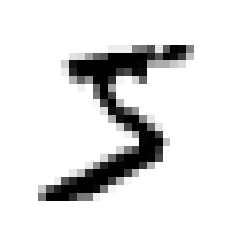

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = mnist["data"][0]
some_digit_image = some_digit.reshape(28,28)
print("The target is " + mnist["target"][0])

plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()
mnist.target = mnist.target.astype(np.int8)
##setting globals
X = mnist["data"]
y = mnist["target"]

In [5]:
#split up data into test and train set
X_train = X[:60000]
X_test = X[60000:]
y_train = y[:60000]
y_test = y[60000:]

In [6]:
y_train_5 = (y_train ==5)
y_test_5 = (y_test ==5)

In [7]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=-inf, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [8]:
f = mnist["data"][0]
sgd_clf.predict([f])

array([ True])

In [9]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = "accuracy")


array([0.9633 , 0.95695, 0.9146 ])

In [10]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [11]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)


array([[52336,  2243],
       [ 1060,  4361]], dtype=int64)

In [12]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7253222453222454

In [13]:
from sklearn.model_selection import cross_val_predict

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method = "decision_function")

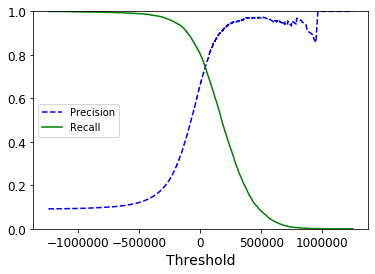

In [14]:
from sklearn.metrics import precision_recall_curve

import matplotlib.pyplot as plt

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plotBRAH(precisions,recalls,thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label = "Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.ylim([0,1])
plotBRAH(precisions,recalls,thresholds)
plt.show()

In [15]:
## below is now training beyond just for 5 (starting OvA)

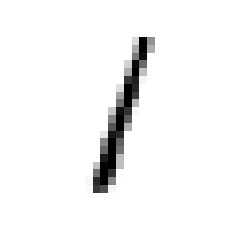

array([1], dtype=int8)

In [16]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X_test[2]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])
#print(y_test[5000])

In [17]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-649134.53637319,   46247.62518677,    2222.2534542 ,
         -65922.80158252, -233464.55299238, -222892.82379694,
        -127017.54556783, -157287.05737197, -192732.69092138,
        -187577.47244328]])

In [18]:
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(random_state = 42))
ovo_clf.fit(X_train,y_train)


OneVsOneClassifier(estimator=SGDClassifier(alpha=0.0001, average=False,
                                           class_weight=None,
                                           early_stopping=False, epsilon=0.1,
                                           eta0=0.0, fit_intercept=True,
                                           l1_ratio=0.15,
                                           learning_rate='optimal',
                                           loss='hinge', max_iter=1000,
                                           n_iter_no_change=5, n_jobs=None,
                                           penalty='l2', power_t=0.5,
                                           random_state=42, shuffle=True,
                                           tol=0.001, validation_fraction=0.1,
                                           verbose=0, warm_start=False),
                   n_jobs=None)

In [19]:
ovo_clf.predict([some_digit])


array([1], dtype=int8)

In [20]:
score = ovo_clf.decision_function([some_digit])
score

array([[0.66666691, 9.33333302, 8.33333281, 5.33333246, 0.66666723,
        0.66666732, 2.66666745, 6.33333214, 7.33333271, 4.33330844]])

In [21]:
cross_val_score(ovo_clf, X_train, y_train, cv=3, scoring = "accuracy")

array([0.91321736, 0.91309565, 0.9153373 ])

In [22]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(ovo_clf, X_train_scaled, y_train, cv = 3)
conf_mx = confusion_matrix(y_train, y_train_pred)
plt.matshow(conf_mx, cmap = plt.cm.gray)
plt.show()

NameError: name 'X_train_scaled' is not defined